In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [5]:
fem_b = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\daily-total-female-births-in-cal.csv')
fem_b

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [4]:
series = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\daily-total-female-births-in-cal.csv')['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


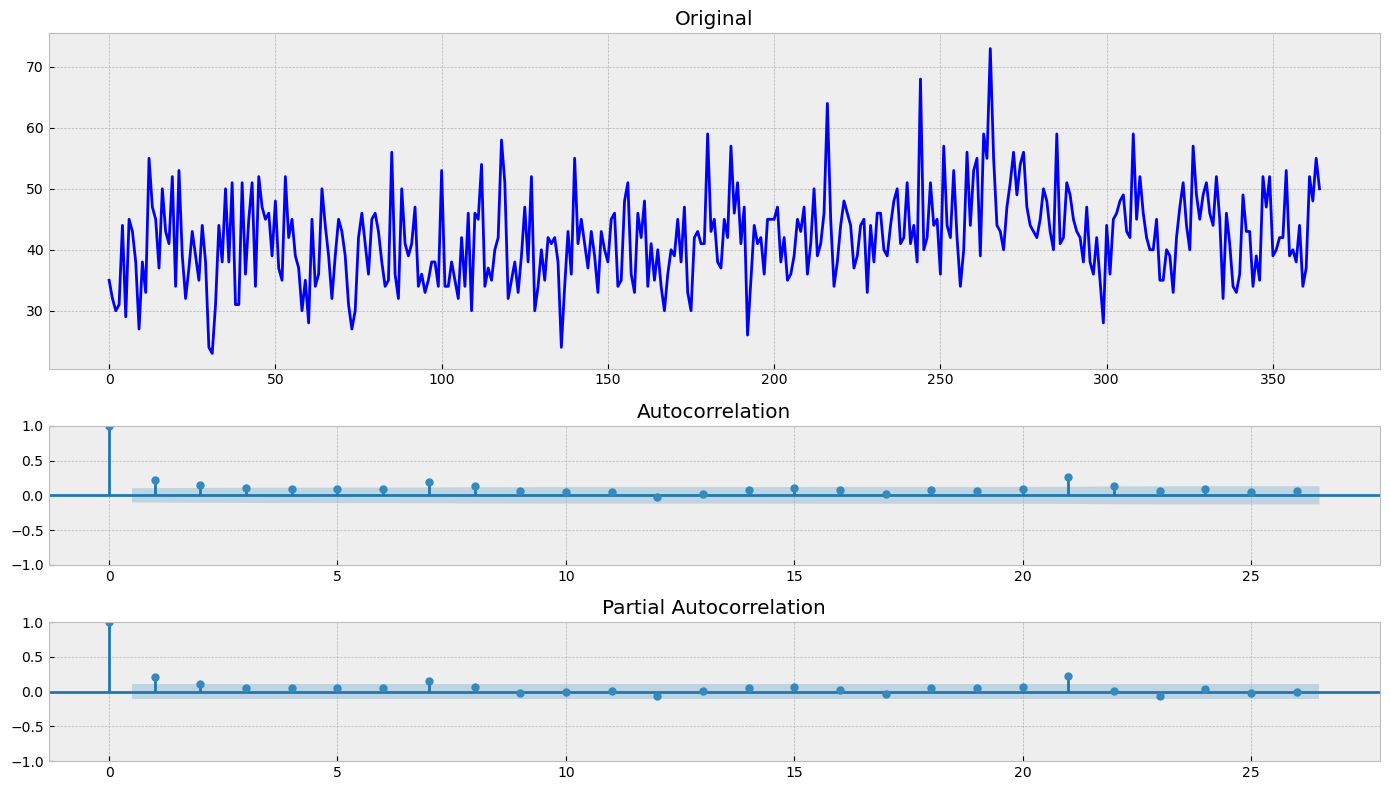

In [6]:
tsplot(series)

Как мы видим, тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда

In [7]:
air = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\international-airline-passengers.csv')
air

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
air_s = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\international-airline-passengers.csv')['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


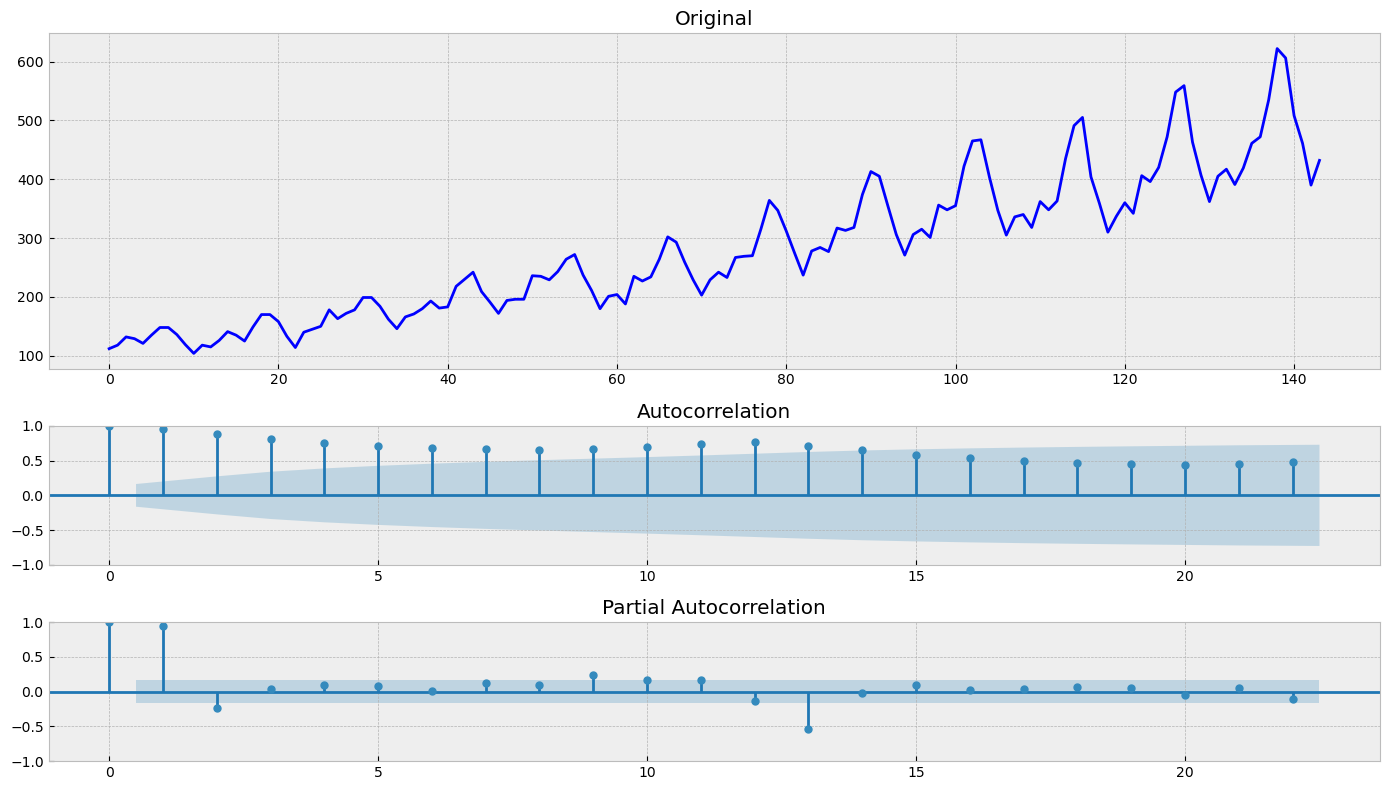

In [9]:
tsplot(air_s)

Тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Необходимы дополнительные преобразования

Попробуем преобразование Бокса-Кокса

In [10]:
air_s = boxcox(air_s, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


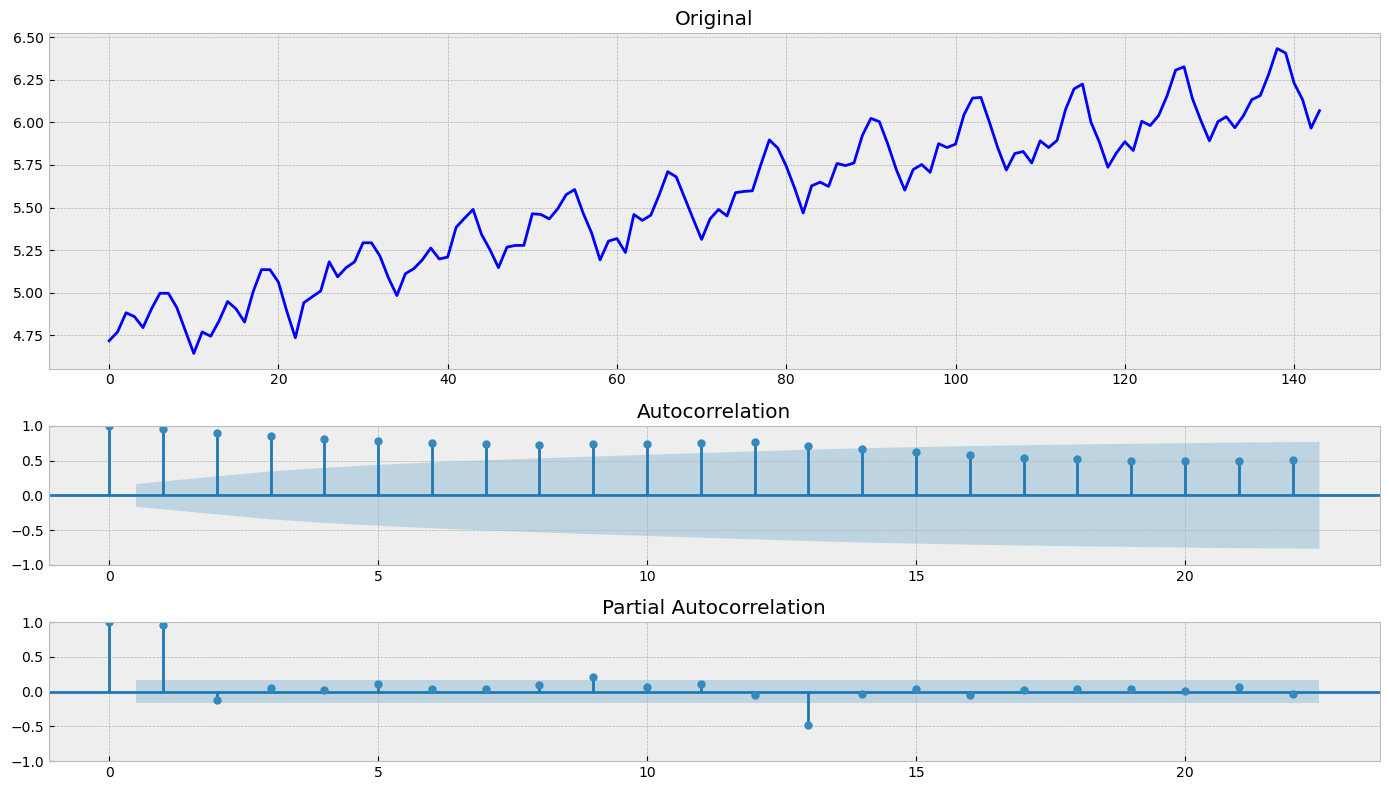

In [11]:
tsplot(air_s)

Удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [12]:
air_s = air_s[1:] - air_s[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


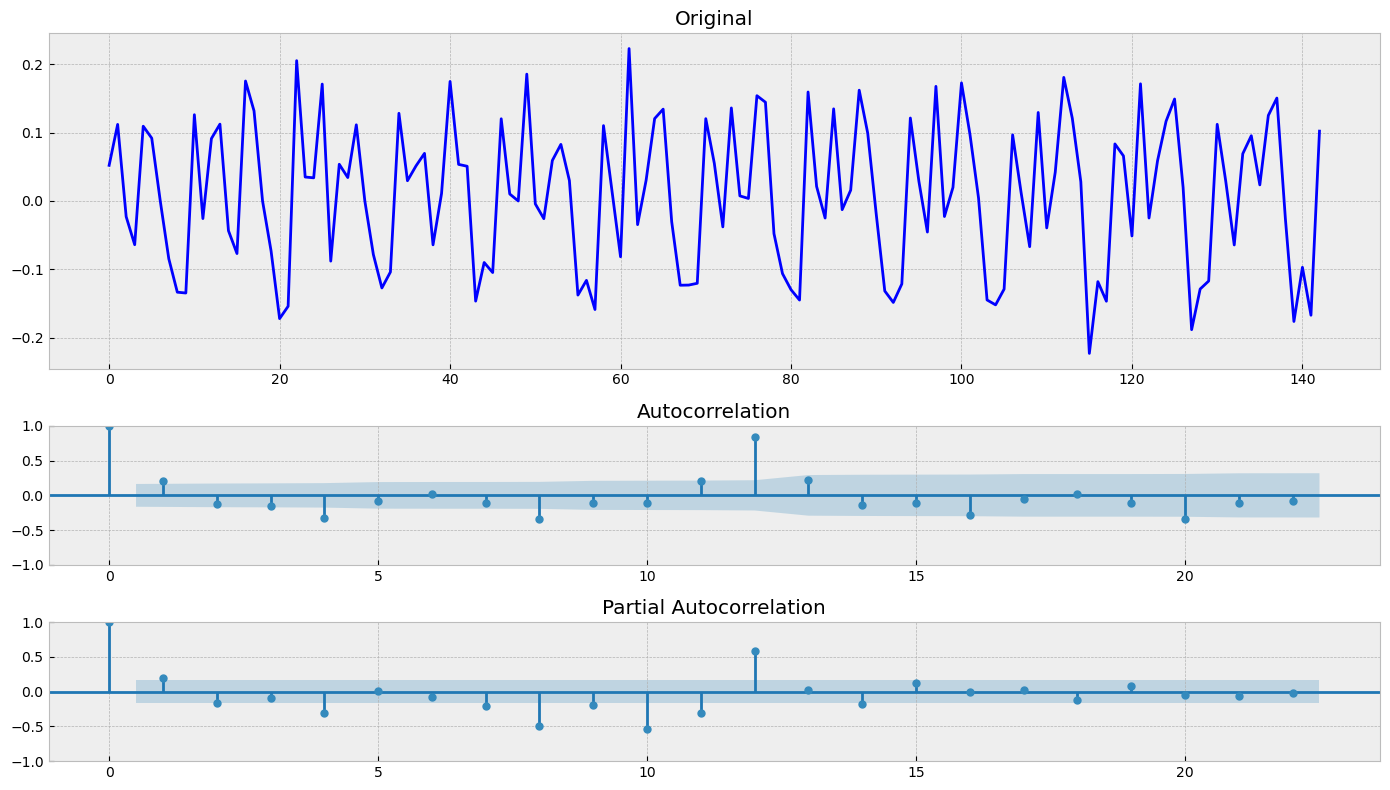

In [13]:
tsplot(air_s)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

In [14]:
air_s = air_s[12:] - air_s[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


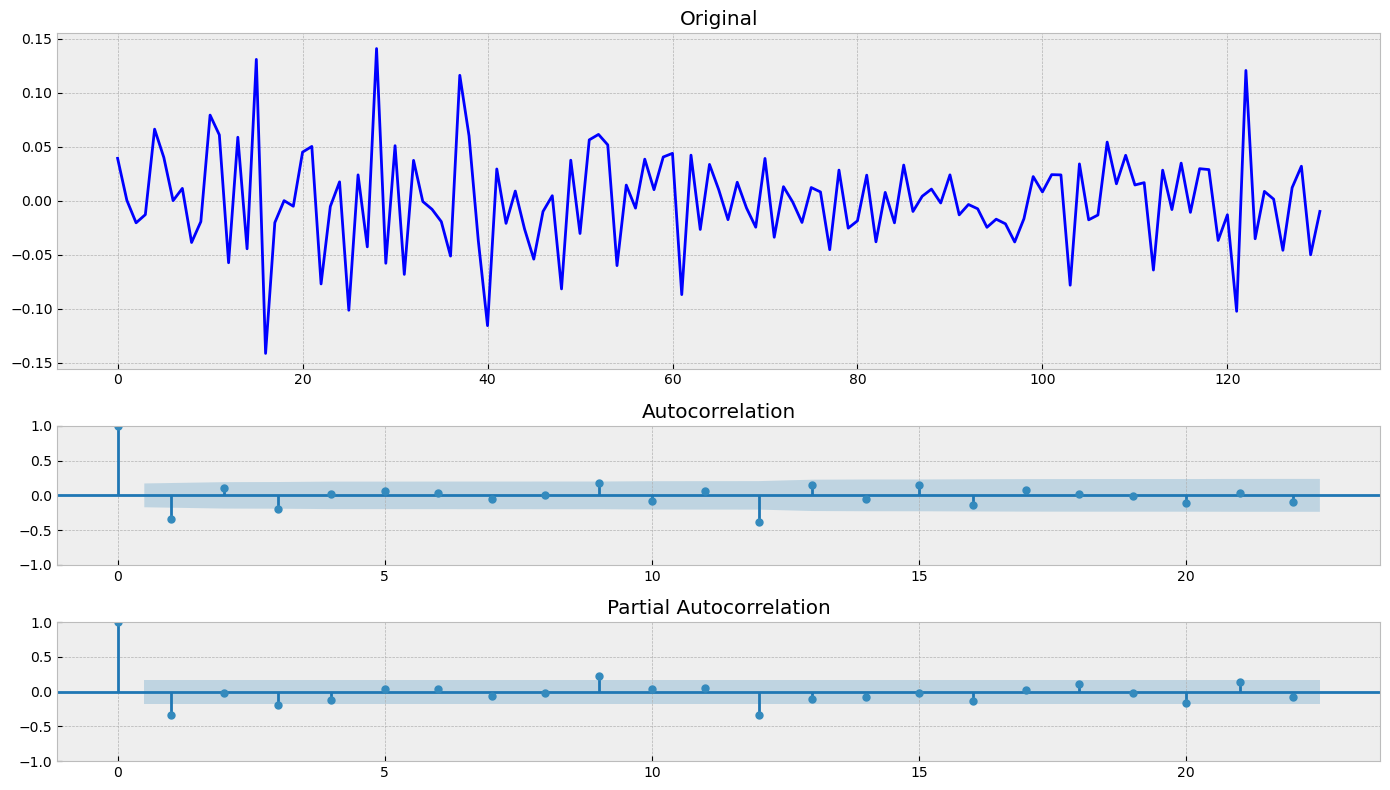

In [34]:
tsplot(air_s)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

In [51]:
air_t = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\mean-monthly-air-temperature-deg.csv')
air_t

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1
...,...,...
235,1939-08,61.8
236,1939-09,58.2
237,1939-10,46.7
238,1939-11,46.6


In [52]:
air_t = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\mean-monthly-air-temperature-deg.csv')['Deg']

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


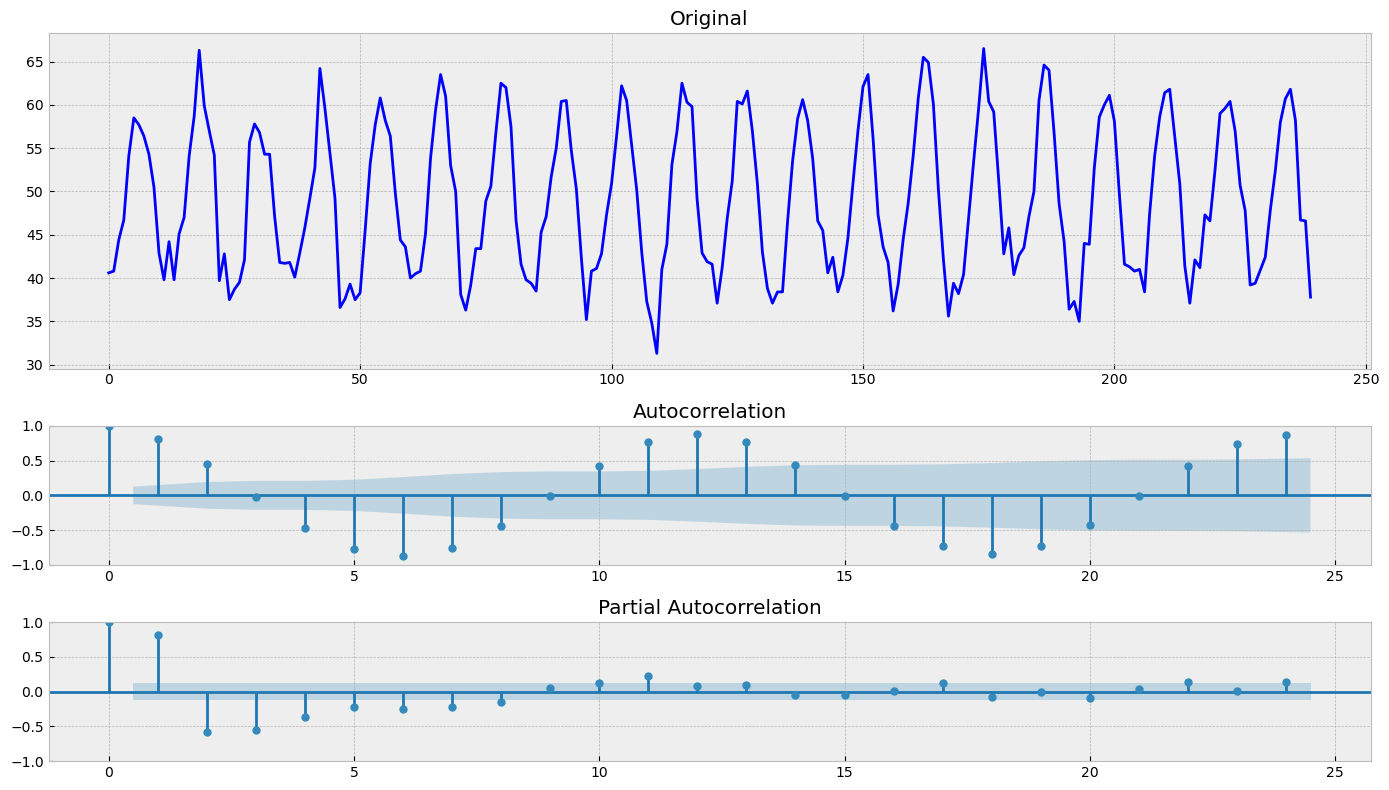

In [53]:
tsplot(air_t)

Тест отвергает гипотезу о нестационарности ряда. Но мы видим сезонность - попробуем все равно ее убрать. 

In [54]:
air_t = boxcox(air_t, 0)
air_t

array([3.70376807, 3.70868208, 3.79323947, 3.84374416, 3.99083419,
       4.06902675, 4.05525717, 4.03246916, 3.99452423, 3.92197334,
       3.75887183, 3.68386691, 3.78872479, 3.68386691, 3.80888225,
       3.8501476 , 3.99083419, 4.07243973, 4.1941899 , 4.09267651,
       4.04305127, 3.99268091, 3.68135119, 3.7565381 , 3.62434093,
       3.6558396 , 3.67630067, 3.74004774, 4.01998015, 4.05698878,
       4.03953633, 3.99452423, 3.99452423, 3.852273  , 3.73289634,
       3.73050113, 3.73289634, 3.69137633, 3.75887183, 3.82428409,
       3.89589362, 3.96461546, 4.16200321, 4.08765557, 3.99636415,
       3.89589362, 3.60004824, 3.62700405, 3.67122452, 3.62434093,
       3.6454499 , 3.81771233, 3.9740584 , 4.05525717, 4.10758979,
       4.06388535, 4.03246916, 3.90801498, 3.79323947, 3.77505715,
       3.68887945, 3.70130197, 3.70868208, 3.80888225, 3.98527347,
       4.08429423, 4.15103991, 4.11087386, 3.97029191, 3.91202301,
       3.64021428, 3.59181774, 3.66867675, 3.77045944, 3.77045

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


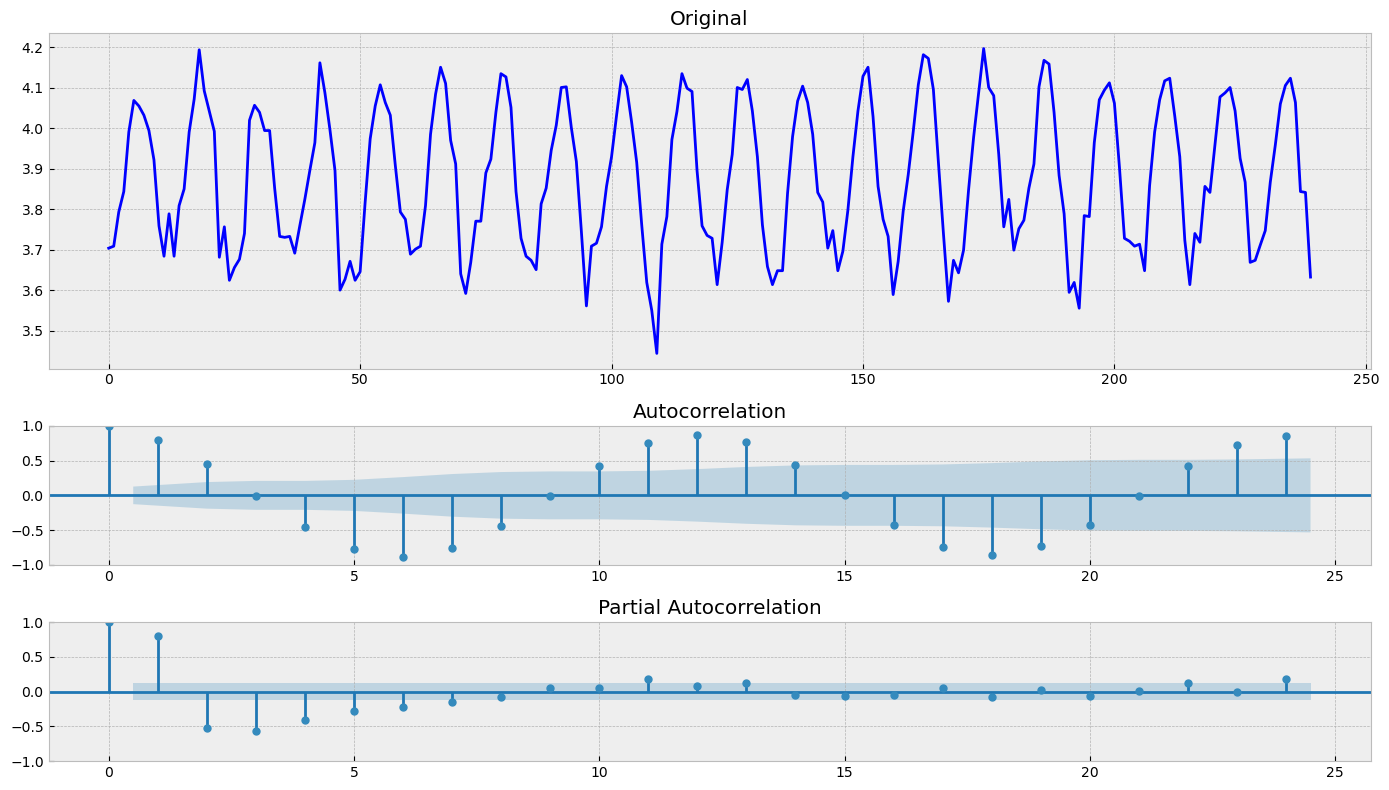

In [55]:
tsplot(air_t)

Results of Dickey-Fuller Test:
Test Statistic                -7.583453e+00
p-value                        2.644407e-11
#Lags Used                     1.200000e+01
Number of Observations Used    2.090000e+02
Critical Value (1%)           -3.462032e+00
Critical Value (5%)           -2.875471e+00
Critical Value (10%)          -2.574195e+00
dtype: float64


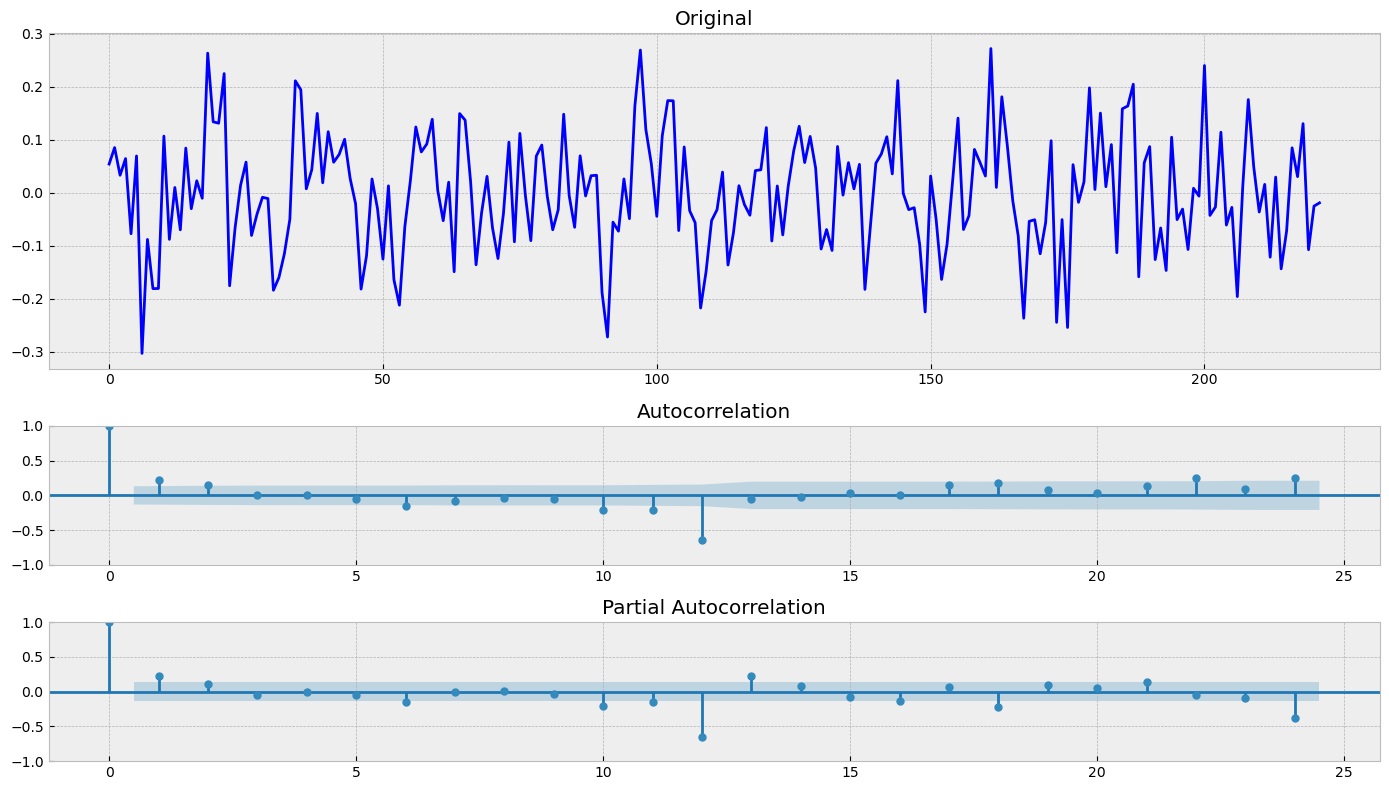

In [60]:
air_t = air_t[12:] - air_t[:-12]
tsplot(air_t)

Мы избавились от сезонности

In [61]:
mbar = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\monthly-boston-armed-robberies-j.csv')
mbar 

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43
...,...,...
113,1975-06,316
114,1975-07,398
115,1975-08,394
116,1975-09,431


Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


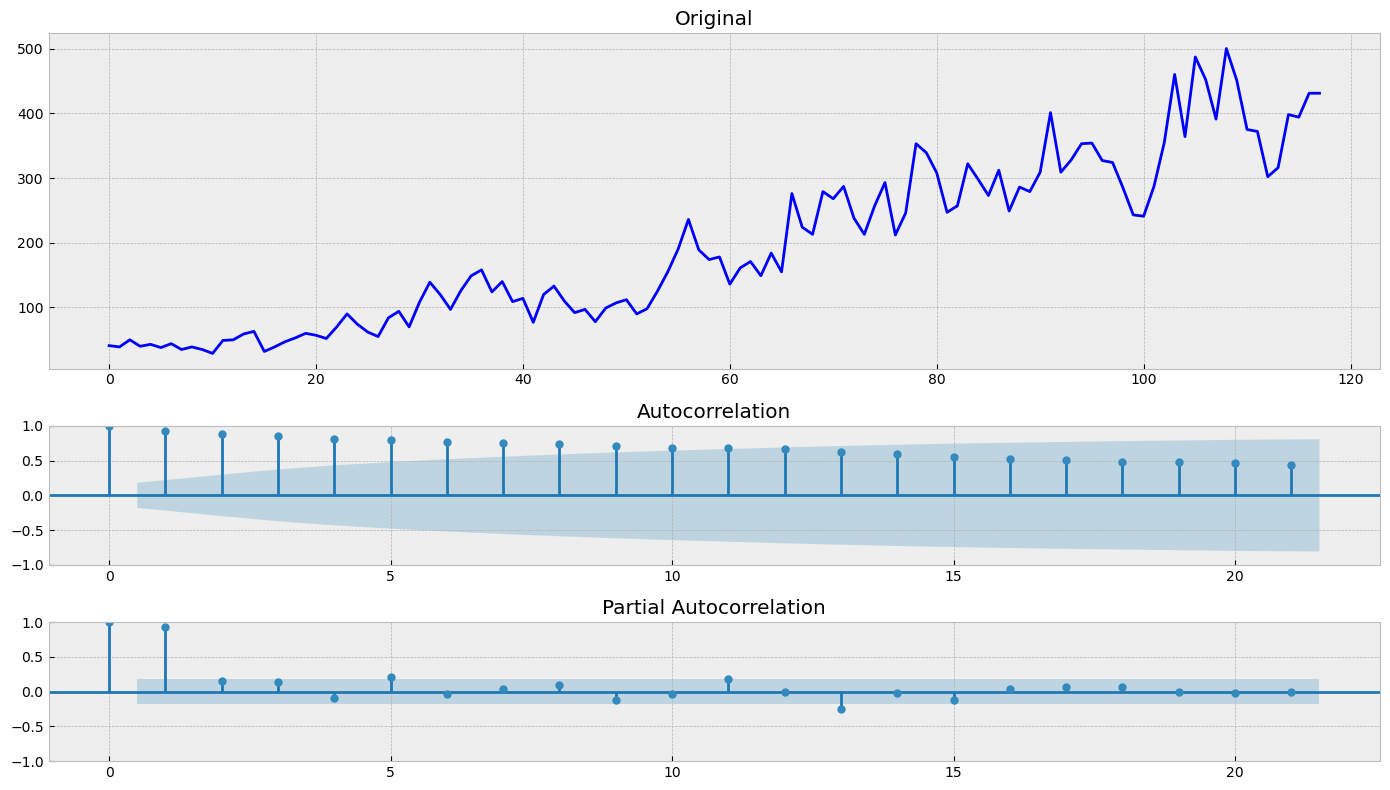

In [63]:
mbar = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\monthly-boston-armed-robberies-j.csv')['Count']
tsplot(mbar)

Из теста видно, что ряд нестационарны и виден тренд. Уберем его

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


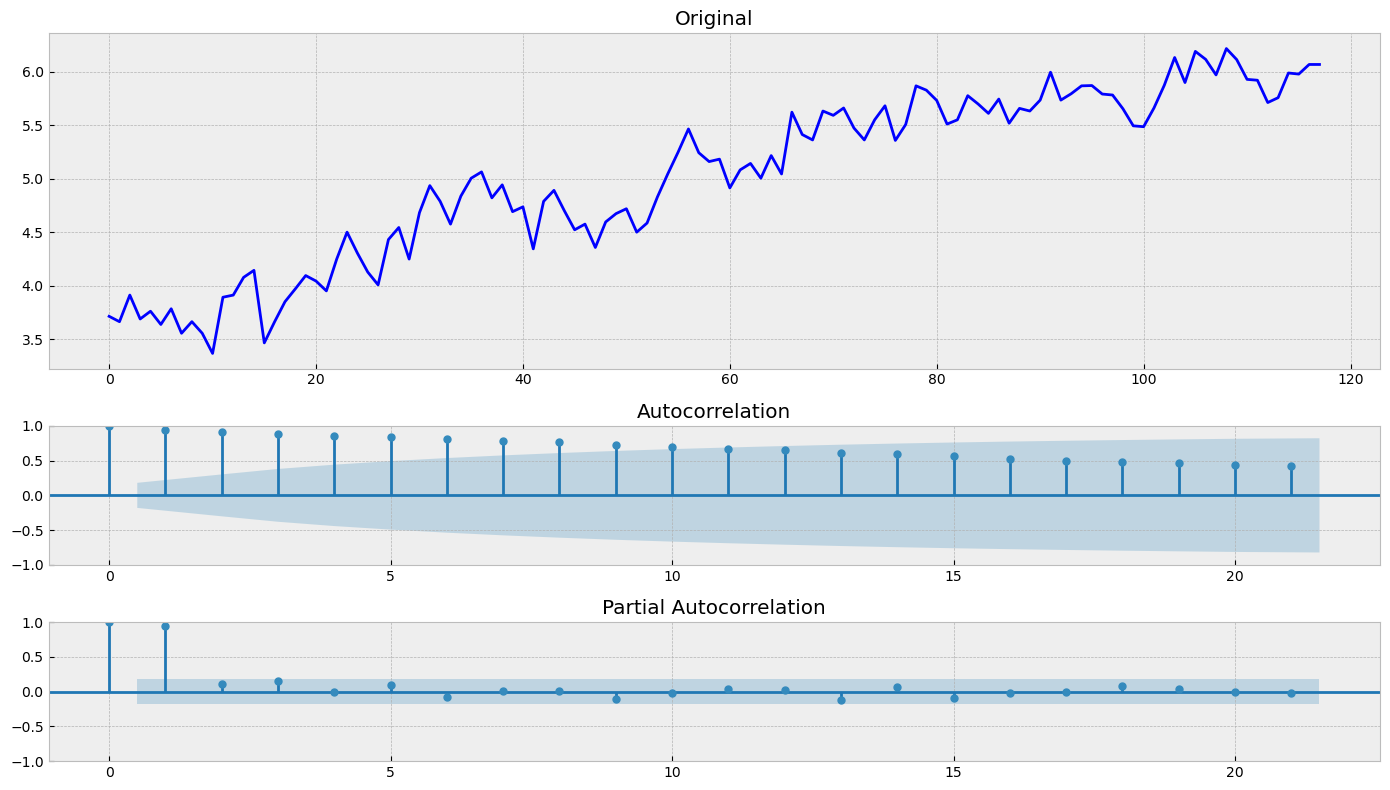

In [64]:
mbar = boxcox(mbar, 0)
tsplot(mbar)

Стало лучше, но все равно надо про дифференцировать

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


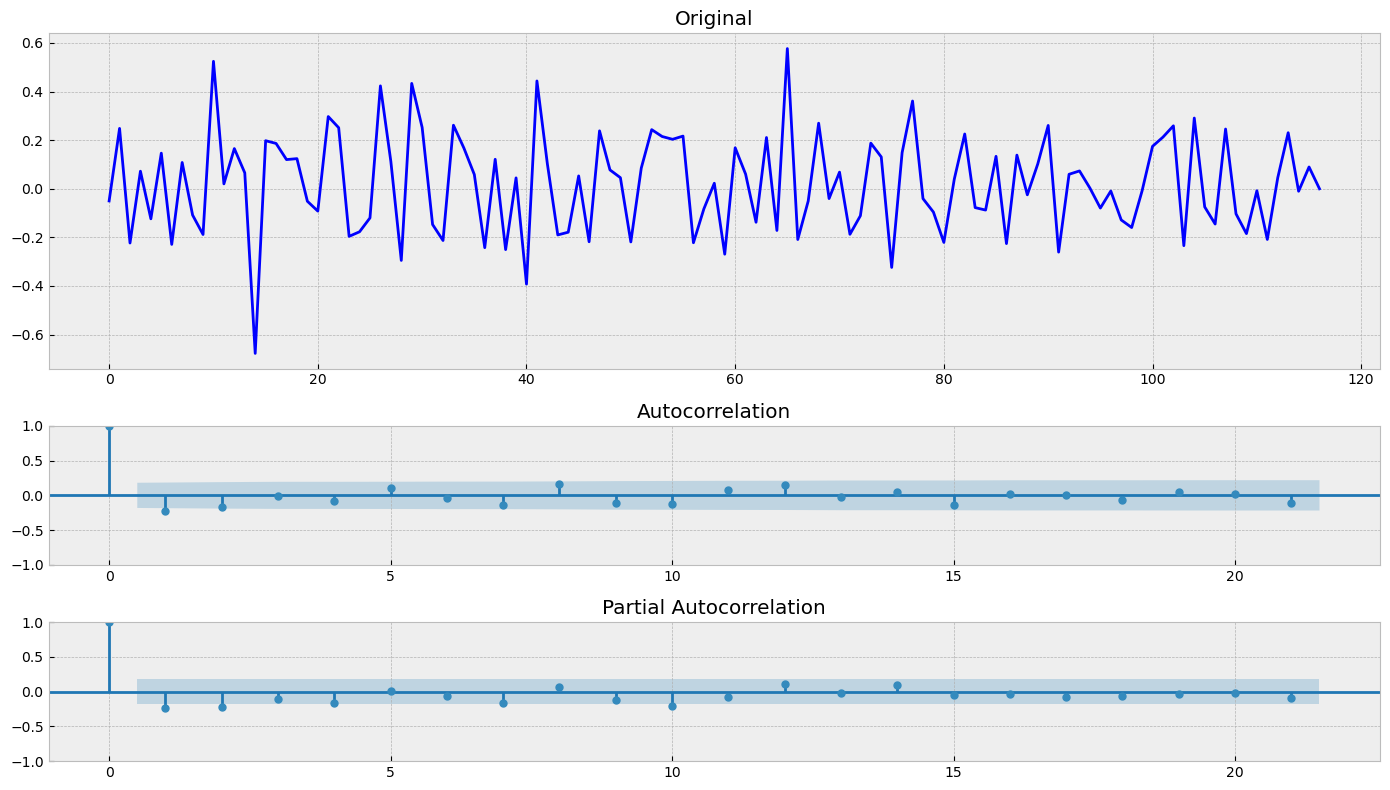

In [65]:
mbar = mbar[1:] - mbar[:-1]
tsplot(mbar)

Теперь ряд стационарный

In [66]:
mscj = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\monthly-sales-of-company-x-jan-6.csv')
mscj

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36
...,...,...
72,1971-01,628
73,1971-02,308
74,1971-03,324
75,1971-04,248


Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


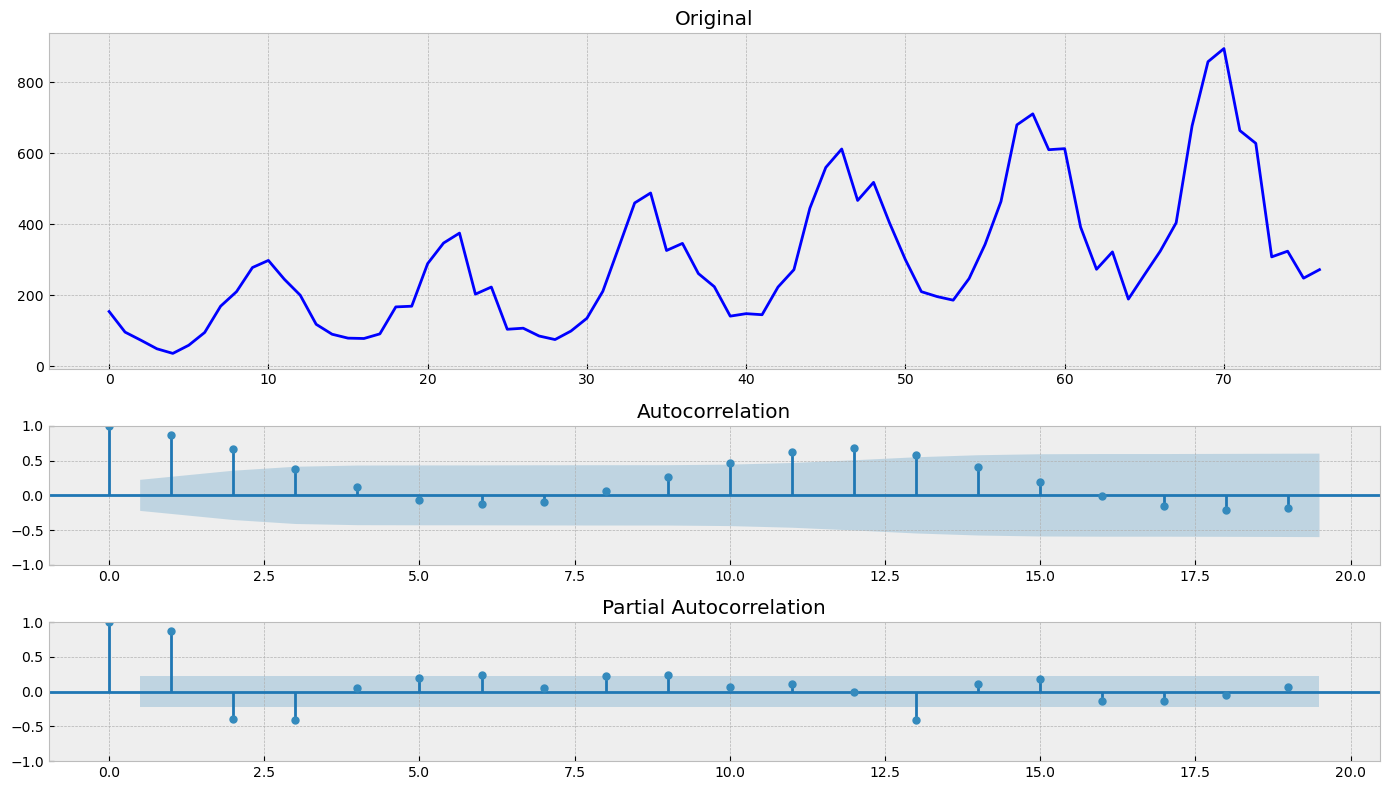

In [67]:
mscj = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\monthly-sales-of-company-x-jan-6.csv')['Count']
tsplot(mscj)

Из теста видно, что ряд нестационарны и виден тренд. Уберем его

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


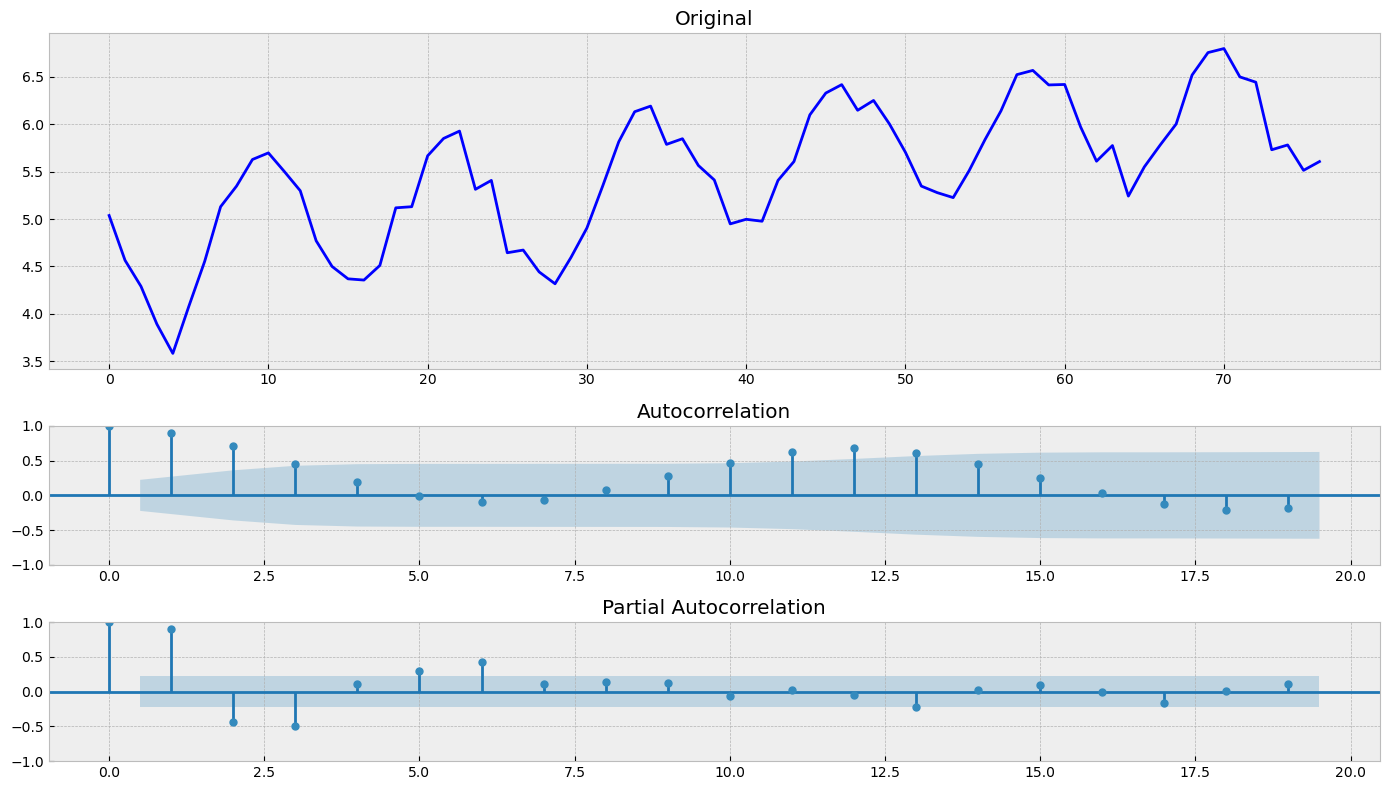

In [68]:
mscj = boxcox(mscj, 0)
tsplot(mscj)

Стало лучше, но надо про дифференцировать

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


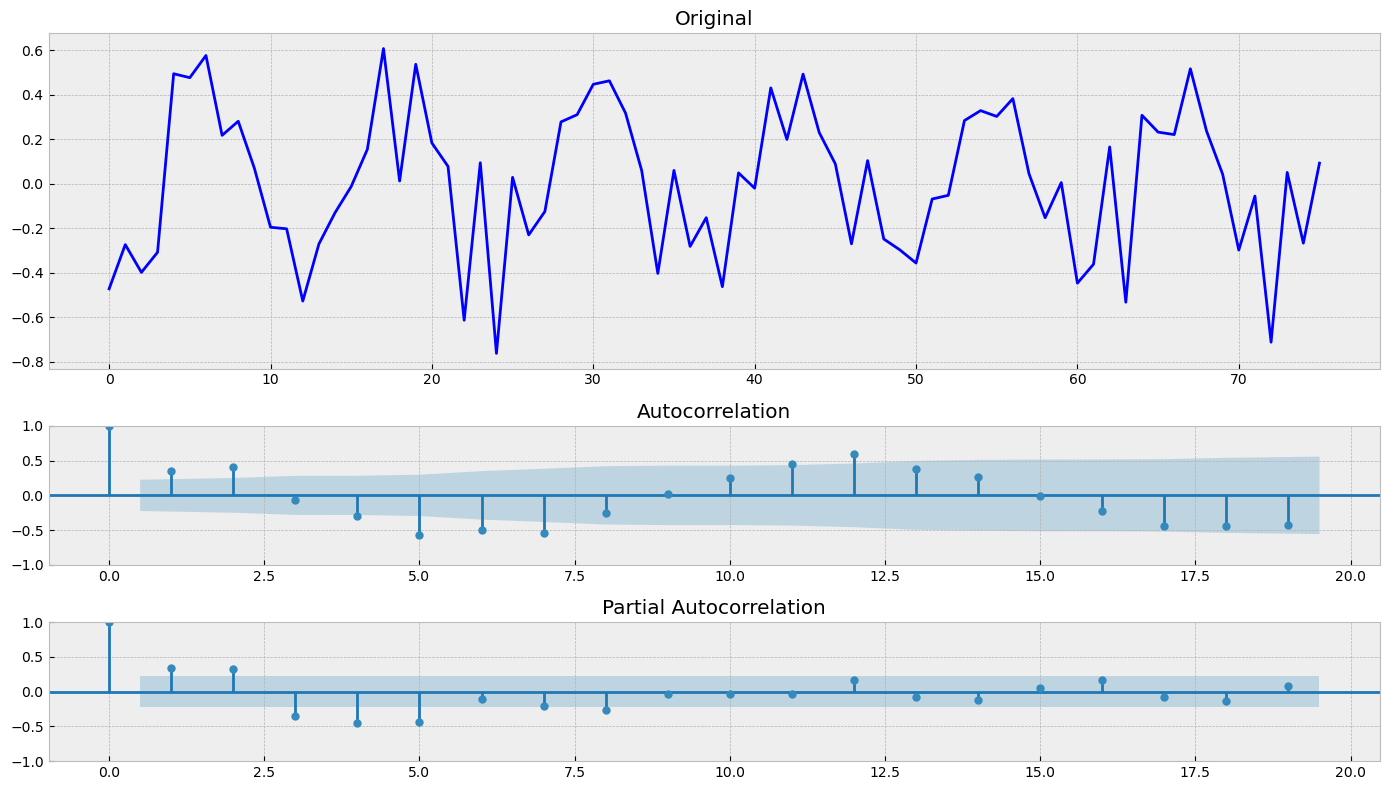

In [69]:
mscj = mscj[1:] - mscj[:-1]
tsplot(mscj)

Теперь ряд стационарен

In [70]:
trading = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\weekly-closings-of-the-dowjones-.csv')
trading

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43
...,...,...
157,1974-W28,791.77
158,1974-W29,787.23
159,1974-W30,787.94
160,1974-W31,784.57


Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


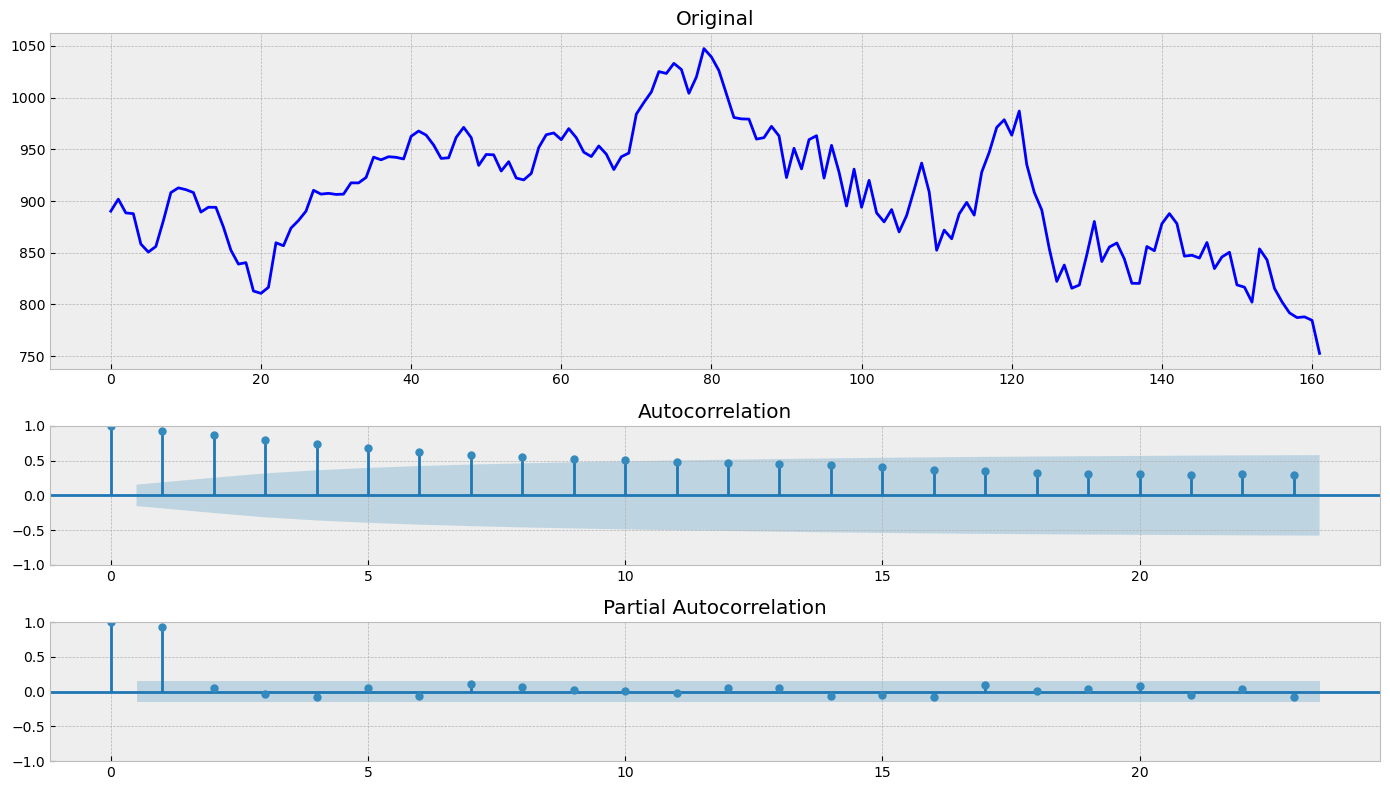

In [71]:
trading = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\weekly-closings-of-the-dowjones-.csv')['Close']
tsplot(trading)

Из теста видно, что ряд нестационарны и виден тренд. Уберем его

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


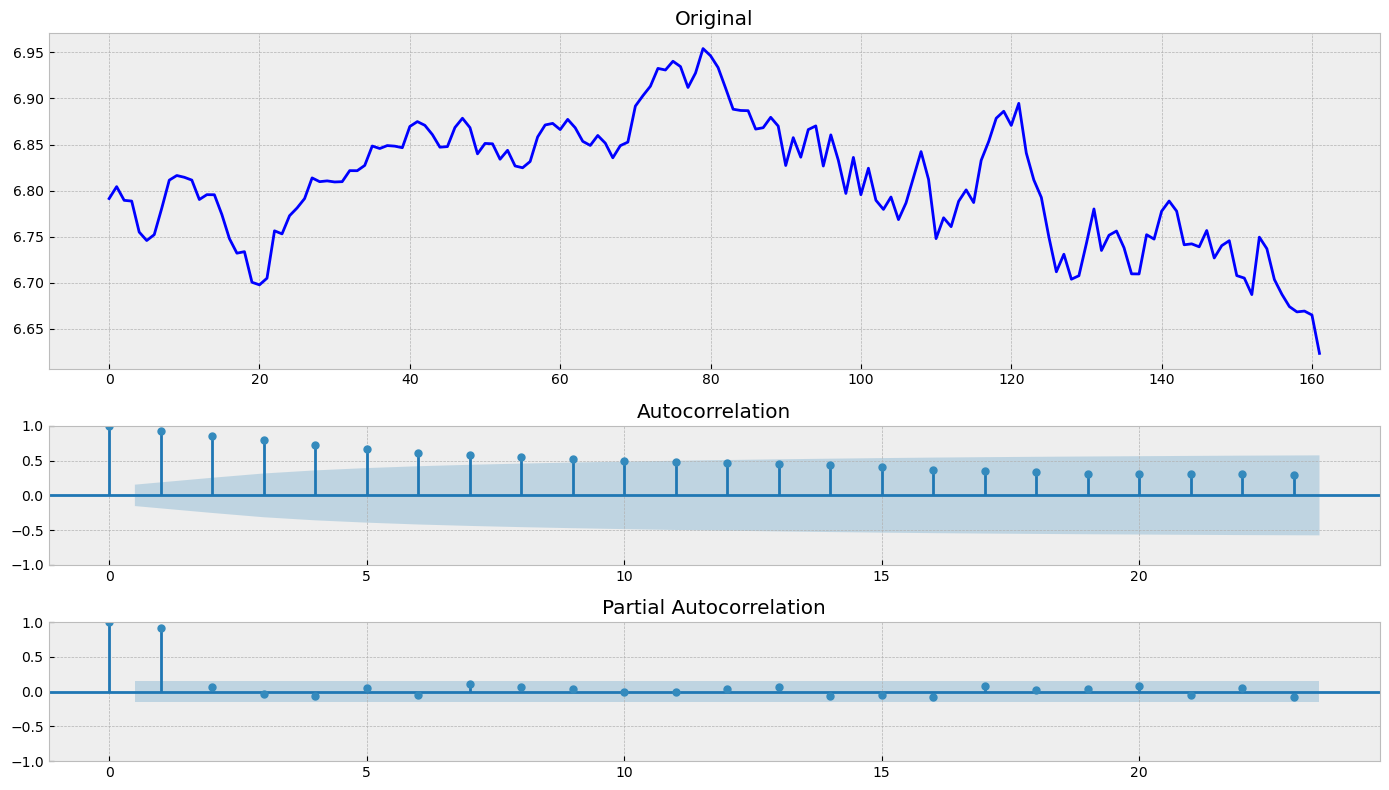

In [72]:
trading = boxcox(trading, 0)
tsplot(trading)

Не помогло, необходимо про дифференцировать

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


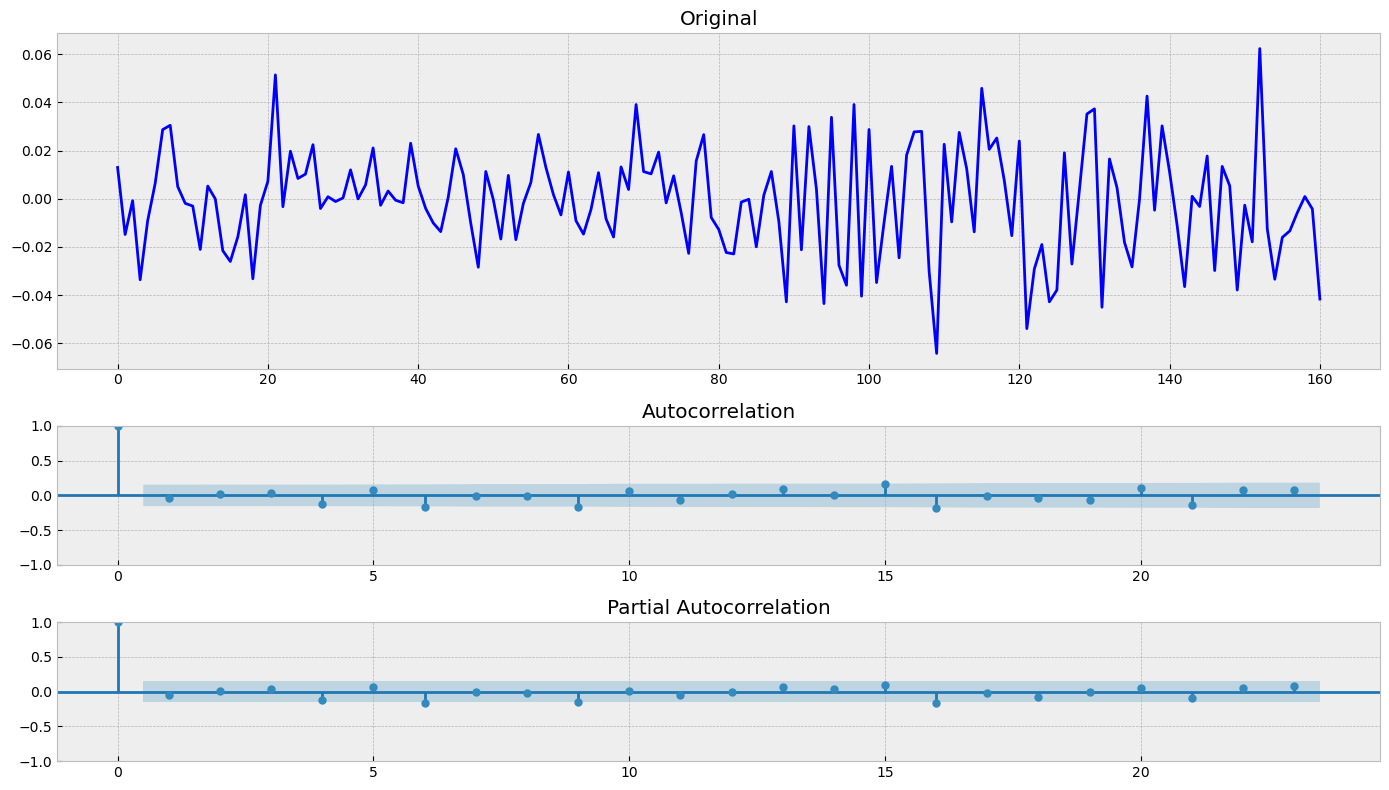

In [73]:
trading = trading[1:] - trading[:-1]
tsplot(trading)

Теперь ряд стационарен